In [1]:
import numpy as np
import pandas as pd

In [7]:
size = 5000
df2 = pd.DataFrame({"CNIC": np.random.randint(1,size, size=(size)),
                   "Account No":np.random.randint(1,10, size=(size)),
                   "Mobile No":np.random.randint(2001,3000, size=(size)),
                  "DOB":pd.date_range('1690-01-01', periods=size, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(size))],
                   "Gender":np.random.choice(["M","F"], size=(size)),
                   "Balance": np.random.randint(1,1000000, size=(size))})
df2.drop_duplicates(inplace=True)
print(len(df2))
df2

5000


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance
0,1699,8,2079,1690-01-31,X,F,321911
1,2532,9,2732,1690-02-28,Q,M,145809
2,2603,3,2514,1690-03-31,L,M,347202
3,3313,4,2662,1690-04-30,Y,F,960117
4,2483,6,2001,1690-05-31,S,F,476576
...,...,...,...,...,...,...,...
4995,3867,5,2628,2106-04-30,U,F,38410
4996,3293,6,2274,2106-05-31,P,F,698672
4997,2518,9,2374,2106-06-30,Y,M,531032
4998,3065,4,2053,2106-07-31,G,F,928634


In [8]:
def slab(amount):
    if amount >= 1000000: return 60
    elif amount >= 500000: return 55
    elif amount >= 300000: return 50
    elif amount >= 100000: return 45
    elif amount >= 50000: return 40
    elif amount >= 20000: return 35
    elif amount >= 10000: return 30
    elif amount >= 5000: return 25
    elif amount >= 1000: return 20
    else: return 0
    
df2['slab'] = df2['Balance'].apply(slab)
df2

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance,slab
0,1699,8,2079,1690-01-31,X,F,321911,50
1,2532,9,2732,1690-02-28,Q,M,145809,45
2,2603,3,2514,1690-03-31,L,M,347202,50
3,3313,4,2662,1690-04-30,Y,F,960117,55
4,2483,6,2001,1690-05-31,S,F,476576,50
...,...,...,...,...,...,...,...,...
4995,3867,5,2628,2106-04-30,U,F,38410,35
4996,3293,6,2274,2106-05-31,P,F,698672,55
4997,2518,9,2374,2106-06-30,Y,M,531032,55
4998,3065,4,2053,2106-07-31,G,F,928634,55


In [9]:
df2['slab'].value_counts()

55    2458
45    1043
50    1037
40     238
35     134
30      49
20      19
25      16
0        6
Name: slab, dtype: int64

In [10]:
slabs = [1,1000,5000,10000,20000,50000,100000,300000,500000,1000000,100000000]
slabs

[1,
 1000,
 5000,
 10000,
 20000,
 50000,
 100000,
 300000,
 500000,
 1000000,
 100000000]

In [11]:
pd.cut(df2['Balance'],slabs)

0        (300000, 500000]
1        (100000, 300000]
2        (300000, 500000]
3       (500000, 1000000]
4        (300000, 500000]
              ...        
4995       (20000, 50000]
4996    (500000, 1000000]
4997    (500000, 1000000]
4998    (500000, 1000000]
4999       (20000, 50000]
Name: Balance, Length: 5000, dtype: category
Categories (10, interval[int64]): [(1, 1000] < (1000, 5000] < (5000, 10000] < (10000, 20000] ... (100000, 300000] < (300000, 500000] < (500000, 1000000] < (1000000, 100000000]]

In [13]:
pd.cut(df2['Balance'],slabs).value_counts()

(500000, 1000000]       2458
(100000, 300000]        1043
(300000, 500000]        1037
(50000, 100000]          238
(20000, 50000]           134
(10000, 20000]            49
(1000, 5000]              19
(5000, 10000]             16
(1, 1000]                  6
(1000000, 100000000]       0
Name: Balance, dtype: int64

In [35]:
slabs = [1,1000,5000,10000,20000,50000,100000,300000,500000,1000000,100000000]
#labels = [0,20,25,30,35,40,45,50,55,60]
labels = [0,20,25,30,35,40,45,50,55,60]

#pd.cut(df2['Balance'],slabs,labels=[0,20,25,30,35,40,45,50,55,60])
df2['slab_two'] = pd.cut(df2['Balance'],slabs,labels=[0,20,25,30,35,40,45,50,55,60])
df2

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender,Balance,slab,slabtwo,slab_two
0,1699,8,2079,1690-01-31,X,F,321911,50,50,50
1,2532,9,2732,1690-02-28,Q,M,145809,45,45,45
2,2603,3,2514,1690-03-31,L,M,347202,50,50,50
3,3313,4,2662,1690-04-30,Y,F,960117,55,55,55
4,2483,6,2001,1690-05-31,S,F,476576,50,50,50
...,...,...,...,...,...,...,...,...,...,...
4995,3867,5,2628,2106-04-30,U,F,38410,35,35,35
4996,3293,6,2274,2106-05-31,P,F,698672,55,55,55
4997,2518,9,2374,2106-06-30,Y,M,531032,55,55,55
4998,3065,4,2053,2106-07-31,G,F,928634,55,55,55


In [37]:
slab2 = [0,0.5,0.8,0.95,1]
pd.qcut(df2['Balance'],slab2).value_counts()

(8.999, 491627.0]        2500
(491627.0, 799186.0]     1500
(799186.0, 949691.35]     750
(949691.35, 999903.0]     250
Name: Balance, dtype: int64

In [40]:
pd.qcut(df2['Balance'],slab2).value_counts()//50

(8.999, 491627.0]        50
(491627.0, 799186.0]     30
(799186.0, 949691.35]    15
(949691.35, 999903.0]     5
Name: Balance, dtype: int64

In [43]:
data_size = 5000
df1 = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(data_size)),
                   "TransactionID":np.random.randint(1,2, size=(data_size)),
                  "Transaction Date":pd.date_range('1690-01-01', periods=data_size, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(data_size)),
                            "Amount":np.random.randint(1,1000000, size=(data_size)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(data_size))})



df1

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,19,1,1690-01-31,IBFT,754399,Karachi
1,21,1,1690-02-28,FT,33370,Islamabad
2,21,1,1690-03-31,IBFT,538243,Karachi
3,19,1,1690-04-30,FT,174569,Islamabad
4,21,1,1690-05-31,IBFT,701379,Karachi
...,...,...,...,...,...,...
4995,14,1,2106-04-30,FT,108659,Karachi
4996,14,1,2106-05-31,TopUP,345652,Karachi
4997,19,1,2106-06-30,TopUP,385710,Islamabad
4998,14,1,2106-07-31,TopUP,676743,Islamabad


In [45]:
pd.qcut(df1['Amount'],slab2).value_counts()

(129.999, 506601.0]     2500
(506601.0, 799676.2]    1500
(799676.2, 953001.3]     750
(953001.3, 999979.0]     250
Name: Amount, dtype: int64

In [47]:
df1

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,19,1,1690-01-31,IBFT,754399,Karachi
1,21,1,1690-02-28,FT,33370,Islamabad
2,21,1,1690-03-31,IBFT,538243,Karachi
3,19,1,1690-04-30,FT,174569,Islamabad
4,21,1,1690-05-31,IBFT,701379,Karachi
...,...,...,...,...,...,...
4995,14,1,2106-04-30,FT,108659,Karachi
4996,14,1,2106-05-31,TopUP,345652,Karachi
4997,19,1,2106-06-30,TopUP,385710,Islamabad
4998,14,1,2106-07-31,TopUP,676743,Islamabad


In [53]:
df1.groupby(['City']).agg(['count'])

,CNIC,TransactionID,Transaction Date,Description,Amount
,count,count,count,count,count
City,,,,,
Islamabad,1721,1721,1721,1721,1721
Karachi,1634,1634,1634,1634,1634
Lahore,1645,1645,1645,1645,1645


In [55]:
df1.groupby("City")[["CNIC"]].agg(["count"])

,CNIC
,count
City,
Islamabad,1721
Karachi,1634
Lahore,1645


In [56]:
df1.groupby(by="City")[["Amount"]].agg(['count' , min , max , np.mean , np.std])

Amount                                            
           count   min     max           mean            std
City                                                        
Islamabad   1721  1133  997905  508535.568274  288965.570420
Karachi     1634   130  999898  498519.990208  289423.848502
Lahore      1645   327  999979  496582.575684  289944.015689

In [57]:
df1.groupby(by="City").Amount.agg(['count' , min , max , np.mean , np.std])

,count,min,max,mean,std
City,,,,,
Islamabad,1721,1133,997905,508535.568274,288965.570420
Karachi,1634,130,999898,498519.990208,289423.848502
Lahore,1645,327,999979,496582.575684,289944.015689


In [58]:
df1.groupby(["City","Description"]).Amount.agg(['count' , min , max , np.mean , np.std])

count   min     max           mean            std
City      Description                                                   
Islamabad FT             575  1133  997905  513653.925217  287057.278339
          IBFT           556  2472  992378  496306.561151  294445.314260
          TopUP          590  1828  996756  515071.623729  285716.513431
Karachi   FT             531   130  999222  514138.041431  292989.676197
          IBFT           574  1364  998939  486427.463415  290777.270349
          TopUP          529  1722  999898  495964.083176  284140.461285
Lahore    FT             513   327  999816  496111.910331  287734.800616
          IBFT           556   670  999979  494118.453237  281414.742826
          TopUP          576   436  999700  499380.324653  300310.153766

In [2]:
size = 5000
transactions = pd.DataFrame({"CNIC": np.random.randint(1,size, size=(size)),
                   "TransactionID":np.arange(1,size+1),
                  "Transaction Date":pd.date_range('1690-01-01', periods=size, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(size)),
                            "Amount":np.random.randint(1,1000000, size=(size)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(size))})
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,4476,1,1690-01-31,FT,685891,Karachi
1,1122,2,1690-02-28,FT,973252,Islamabad
2,1188,3,1690-03-31,IBFT,387446,Karachi
3,415,4,1690-04-30,FT,904482,Lahore
4,883,5,1690-05-31,TopUP,765835,Lahore
...,...,...,...,...,...,...
4995,2843,4996,2106-04-30,IBFT,179374,Lahore
4996,2452,4997,2106-05-31,IBFT,934671,Karachi
4997,1165,4998,2106-06-30,IBFT,619581,Islamabad
4998,4172,4999,2106-07-31,TopUP,580908,Islamabad


In [3]:
transactions.groupby([transactions.City]).CNIC

In [4]:
transactions.groupby([transactions.City]).CNIC.unique()

City
Islamabad    [1122, 1943, 2013, 2760, 2900, 3896, 4215, 222...
Karachi      [4476, 1188, 4511, 3233, 4795, 484, 405, 3122,...
Lahore       [415, 883, 4537, 1773, 92, 2848, 4330, 3460, 3...
Name: CNIC, dtype: object

In [7]:
transactions.groupby([transactions.City]).CNIC.unique().apply(len)

City
Islamabad    1432
Karachi      1453
Lahore       1391
Name: CNIC, dtype: int64

In [12]:
transactions.pivot_table("CNIC","City","Description")

Description,FT,IBFT,TopUP
City,,,
Islamabad,2585.323017,2525.603509,2505.519504
Karachi,2515.061750,2514.519011,2527.280201
Lahore,2490.170956,2542.784278,2439.457505


In [14]:
#count all transaction according to description column
transactions.pivot_table("CNIC","City","Description" , aggfunc = "count")

Description,FT,IBFT,TopUP
City,,,
Islamabad,517,570,564
Karachi,583,526,596
Lahore,544,547,553


In [16]:
# count  all unique customer cnic according to descriotion columns
transactions.groupby(["City","Description"]).CNIC.unique().apply(len)

City       Description
Islamabad  FT             493
           IBFT           543
           TopUP          539
Karachi    FT             549
           IBFT           499
           TopUP          567
Lahore     FT             518
           IBFT           514
           TopUP          520
Name: CNIC, dtype: int64

In [17]:
pd.DataFrame(transactions.groupby(["City","Description"]).CNIC.unique().apply(len))

CNIC
City      Description      
Islamabad FT            493
          IBFT          543
          TopUP         539
Karachi   FT            549
          IBFT          499
          TopUP         567
Lahore    FT            518
          IBFT          514
          TopUP         520

In [18]:
pd.DataFrame(transactions.groupby(["City","Description"]).CNIC.unique().apply(len).unstack())

Description,FT,IBFT,TopUP
City,,,
Islamabad,493,543,539
Karachi,549,499,567
Lahore,518,514,520


In [20]:
a = pd.DataFrame(transactions.groupby(["City","Description"]).CNIC.unique().apply(len).unstack())
a.loc[["Lahore"]]

Description,FT,IBFT,TopUP
City,,,
Lahore,518,514,520


In [24]:
#Unique customrers who did transaction in last 6 months
b = transactions[(transactions["Transaction Date"] >= '2020-10-10') & (transactions["Transaction Date"] >= '2021-04-09') ]
b

,CNIC,TransactionID,Transaction Date,Description,Amount,City
3975,3352,3976,2021-04-30,IBFT,612614,Islamabad
3976,2326,3977,2021-05-31,TopUP,368681,Lahore
3977,2997,3978,2021-06-30,TopUP,868332,Karachi
3978,581,3979,2021-07-31,IBFT,597476,Lahore
3979,4021,3980,2021-08-31,FT,979633,Karachi
...,...,...,...,...,...,...
4995,2843,4996,2106-04-30,IBFT,179374,Lahore
4996,2452,4997,2106-05-31,IBFT,934671,Karachi
4997,1165,4998,2106-06-30,IBFT,619581,Islamabad
4998,4172,4999,2106-07-31,TopUP,580908,Islamabad


In [25]:
len(b)

1025

In [28]:
transactive = transactions[(transactions['Transaction Date'] >= '2020-10-10') &
              (transactions['Transaction Date'] <= '2021-04-09')]
print(len(transactive))
transactive

6


,CNIC,TransactionID,Transaction Date,Description,Amount,City
3969,3188,3970,2020-10-31,IBFT,774760,Islamabad
3970,3756,3971,2020-11-30,IBFT,365793,Islamabad
3971,1496,3972,2020-12-31,IBFT,722876,Lahore
3972,3802,3973,2021-01-31,FT,371283,Islamabad
3973,1328,3974,2021-02-28,IBFT,910855,Islamabad
3974,1379,3975,2021-03-31,FT,575542,Karachi


In [38]:
def check_transacting(x):
    return np.in1d(x,transactive).sum()

In [39]:
pd.DataFrame(transactions.groupby(["City","Description"]).CNIC.unique().apply(check_transacting).unstack())

/home/zaid/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Description,FT,IBFT,TopUP
City,,,
Islamabad,3,6,2
Karachi,1,1,2
Lahore,0,3,2


<AxesSubplot:xlabel='City'>

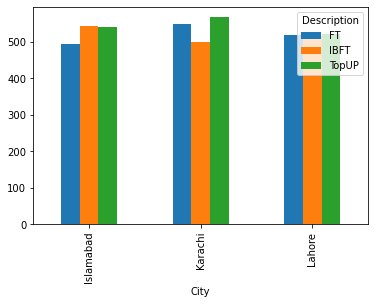

In [42]:
a.plot(kind= 'bar')